In [1]:
import numpy
import pandas
import seaborn
import matplotlib.pyplot as pyplot

In [ ]:
atus_headers = list(pandas.read_csv("atus_anual_1997.csv", nrows=1))
atus_headers.append("FALSA") # Solo si termina en , cada fila en el CSV

atus = pandas.read_csv("atus_anual_1997.csv", header=None, skiprows=1)
atus.columns = atus_headers

# Mostramos los primeros 10 registros
atus.head(10) # atus.tail(10)

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,FALSA
0,Municipal,1,1,1997,1,20,0,7,Martes,Accidente en no intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas,NaN
1,Municipal,1,1,1997,1,20,0,19,Domingo,Accidente en intersección,...,0,0,0,0,0,0,0,No fatal,Cifras Revisadas,NaN
2,Municipal,1,1,1997,1,20,0,20,Lunes,Accidente en no intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas,NaN
3,Municipal,1,1,1997,1,20,5,22,Miércoles,Accidente en no intersección,...,0,0,0,0,0,0,0,No fatal,Cifras Revisadas,NaN
4,Municipal,1,1,1997,1,20,15,25,Sábado,Accidente en intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas,NaN
5,Municipal,1,1,1997,1,20,20,14,Martes,Accidente en intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas,NaN
6,Municipal,1,1,1997,1,20,20,17,Viernes,Accidente en no intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas,NaN
7,Municipal,1,1,1997,1,20,25,21,Martes,Accidente en intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas,NaN
8,Municipal,1,1,1997,1,20,30,12,Domingo,Accidente en intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas,NaN
9,Municipal,1,1,1997,1,20,25,8,Miércoles,Accidente en no intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Revisadas,NaN


In [27]:
atus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248114 entries, 0 to 248113
Data columns (total 46 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   COBERTURA     248114 non-null  object 
 1   ID_ENTIDAD    248114 non-null  int64  
 2   ID_MUNICIPIO  248114 non-null  int64  
 3   ANIO          248114 non-null  int64  
 4   MES           248114 non-null  int64  
 5   ID_HORA       248114 non-null  int64  
 6   ID_MINUTO     248114 non-null  int64  
 7   ID_DIA        248114 non-null  int64  
 8   DIASEMANA     248114 non-null  object 
 9   URBANA        248114 non-null  object 
 10  SUBURBANA     248114 non-null  object 
 11  TIPACCID      248114 non-null  object 
 12  AUTOMOVIL     248114 non-null  int64  
 13  CAMPASAJ      248114 non-null  int64  
 14  MICROBUS      248114 non-null  int64  
 15  PASCAMION     248114 non-null  int64  
 16  OMNIBUS       248114 non-null  int64  
 17  TRANVIA       248114 non-null  int64  
 18  CAMI

<Axes: ylabel='ID_ENTIDAD'>

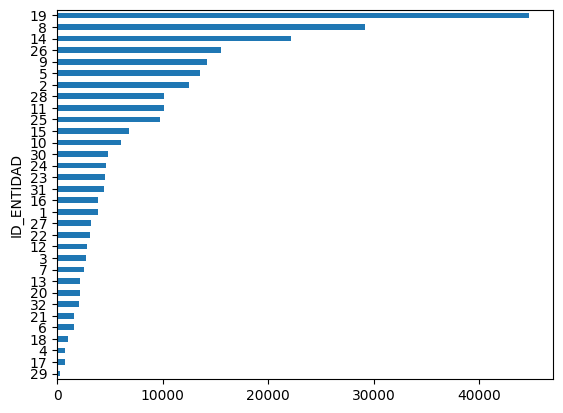

In [ ]:
# atus["ID_ENTIDAD"].map({ 1: "Aguascalientes", 2: "Baja California", ..., 32: "Zacatecas" }).value_counts().sort_values().plot.barh()
atus["ID_ENTIDAD"].value_counts().sort_values().plot.barh()

In [33]:
trabajos = pandas.Series([1, 2, 1, 2, 3, 2, 1, 4])

trabajos

0    1
1    2
2    1
3    2
4    3
5    2
6    1
7    4
dtype: int64

In [34]:
trabajos.map({
    1: "Gobierno",
    2: "Empresa Lucrativa",
    3: "Empresa No-Lucrativa",
    4: "Sin trabajo"
})

0                Gobierno
1       Empresa Lucrativa
2                Gobierno
3       Empresa Lucrativa
4    Empresa No-Lucrativa
5       Empresa Lucrativa
6                Gobierno
7             Sin trabajo
dtype: object

<Axes: >

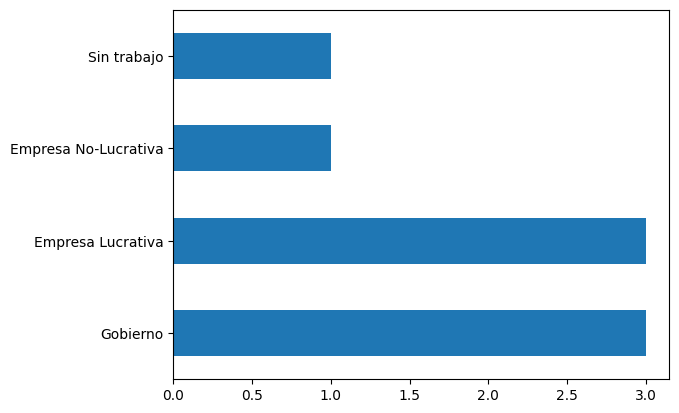

In [37]:
trabajos.map({
    1: "Gobierno",
    2: "Empresa Lucrativa",
    3: "Empresa No-Lucrativa",
    4: "Sin trabajo"
}).value_counts().plot.barh()

<Axes: ylabel='DIASEMANA'>

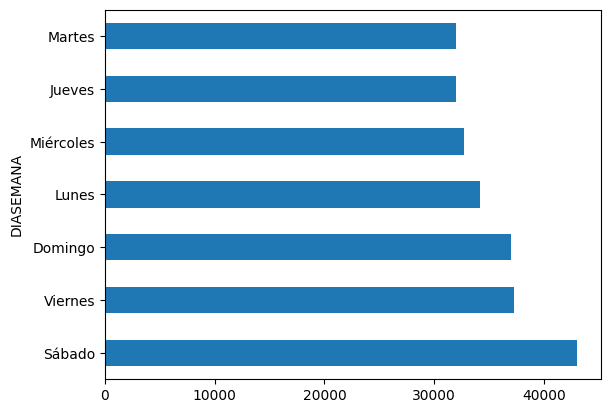

In [39]:
atus["DIASEMANA"].value_counts().plot.barh()

<Axes: ylabel='ID_HORA'>

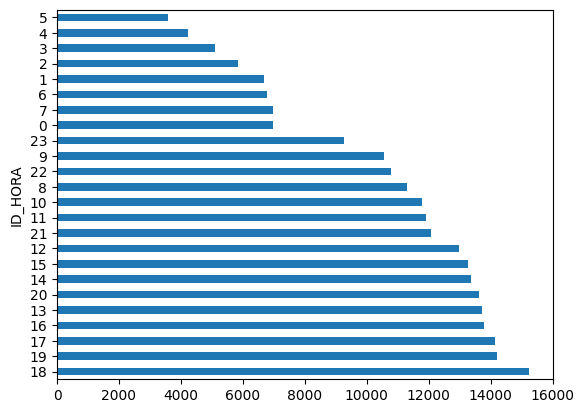

In [40]:
atus["ID_HORA"].value_counts().plot.barh()

In [41]:
atus["ID_HORA"] # Columna Hora

0         20
1         20
2         20
3         20
4         20
          ..
248109    13
248110    10
248111    23
248112    23
248113    23
Name: ID_HORA, Length: 248114, dtype: int64

In [44]:
def agrupar_hora(hora):
    if numpy.isnan(hora):
        return "Desconocido"

    if hora >= 0 and hora <= 7:
        return "Madrugada"
    elif hora >= 8 and hora <= 12:
        return "Mañana"
    elif hora >= 13 and hora <= 16:
        return "Tarde 1"
    elif hora >= 17 and hora <= 19:
        return "Tarde 2"
    else:
        return "Noche"

atus["GRUPO_HORA"] = atus["ID_HORA"].apply(agrupar_hora)

atus

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,FALSA,GRUPO_HORA
0,Municipal,1,1,1997,1,20,0,7,Martes,Accidente en no intersección,...,0,0,0,0,0,0,Sólo daños,Cifras Revisadas,NaN,Noche
1,Municipal,1,1,1997,1,20,0,19,Domingo,Accidente en intersección,...,0,0,0,0,0,0,No fatal,Cifras Revisadas,NaN,Noche
2,Municipal,1,1,1997,1,20,0,20,Lunes,Accidente en no intersección,...,0,0,0,0,0,0,Sólo daños,Cifras Revisadas,NaN,Noche
3,Municipal,1,1,1997,1,20,5,22,Miércoles,Accidente en no intersección,...,0,0,0,0,0,0,No fatal,Cifras Revisadas,NaN,Noche
4,Municipal,1,1,1997,1,20,15,25,Sábado,Accidente en intersección,...,0,0,0,0,0,0,Sólo daños,Cifras Revisadas,NaN,Noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248109,Municipal,32,56,1997,12,13,30,16,Martes,Accidente en no intersección,...,0,0,0,0,0,0,Sólo daños,Cifras Revisadas,NaN,Tarde 1
248110,Municipal,32,56,1997,12,10,30,12,Viernes,Accidente en no intersección,...,0,0,0,0,0,0,No fatal,Cifras Revisadas,NaN,Mañana
248111,Municipal,32,56,1997,12,23,0,13,Sábado,Sin accidente en esta zona,...,0,0,0,0,0,0,Sólo daños,Cifras Revisadas,NaN,Noche
248112,Municipal,32,56,1997,12,23,30,12,Viernes,Accidente en no intersección,...,0,0,0,0,0,0,No fatal,Cifras Revisadas,NaN,Noche


In [54]:
atus["ID_HORA"].value_counts()

ID_HORA
18    15248
19    14211
17    14151
16    13788
13    13719
20    13617
14    13368
15    13271
12    12963
21    12069
11    11902
10    11768
8     11286
22    10794
9     10559
23     9249
0      6982
7      6977
6      6768
1      6682
2      5829
3      5104
4      4230
5      3579
Name: count, dtype: int64

In [50]:
atus["GRUPO_HORA"].value_counts()

GRUPO_HORA
Mañana       58478
Tarde 1      54146
Madrugada    46151
Noche        45729
Tarde 2      43610
Name: count, dtype: int64

In [52]:
atus["GRUPO_HORA"].value_counts() / numpy.array([5, 4, 8, 4, 3])

GRUPO_HORA
Mañana       11695.600000
Tarde 1      13536.500000
Madrugada     5768.875000
Noche        11432.250000
Tarde 2      14536.666667
Name: count, dtype: float64

Text(0, 0.5, 'Grupo horario')

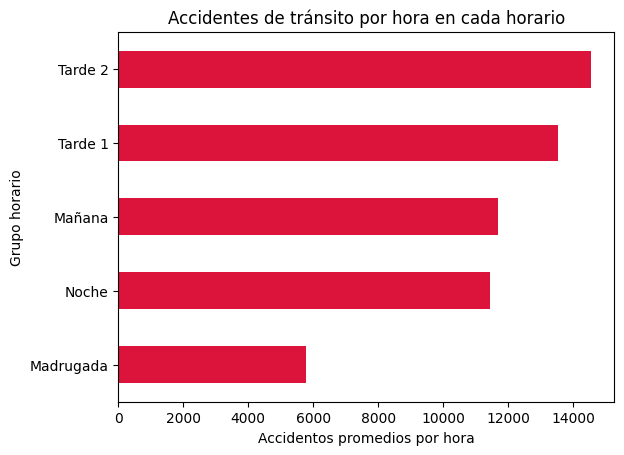

In [58]:
frecuencias = numpy.array([5, 4, 8, 4, 3])

(atus["GRUPO_HORA"].value_counts() / frecuencias).sort_values().plot.barh(color="crimson")
pyplot.title("Accidentes de tránsito por hora en cada horario")
pyplot.xlabel("Accidentos promedios por hora")
pyplot.ylabel("Grupo horario")

In [60]:
atus["TIPACCID"].value_counts()

TIPACCID
Colisión con vehículo automotor          176863
Colisión con objeto fijo                  24317
Colisión con peatón (atropellamiento)     20192
Volcadura                                  5726
Colisión con ciclista                      4600
Otro                                       4504
Salida del camino                          4266
Colisión con motocicleta                   4098
Caída de pasajero                          1659
Colisión con animal                        1096
Incendio                                    452
Colisión con ferrocarril                    341
Name: count, dtype: int64

In [61]:
atus["ALIENTO"].value_counts()

ALIENTO
No           134317
Se ignora     84385
Sí            29412
Name: count, dtype: int64

<Axes: xlabel='TIPACCID'>

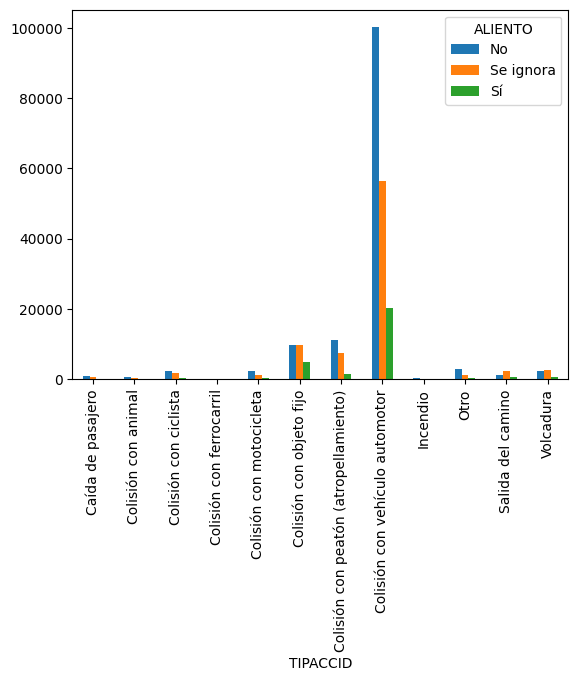

In [65]:
atus.groupby(["TIPACCID", "ALIENTO"]).size().unstack().plot.bar()

<Axes: xlabel='ALIENTO'>

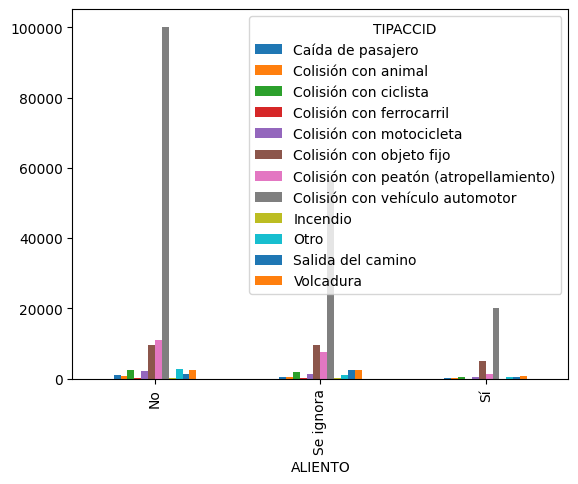

In [66]:
atus.groupby(["ALIENTO", "TIPACCID"]).size().unstack().plot.bar()

<Axes: xlabel='TIPACCID', ylabel='ALIENTO'>

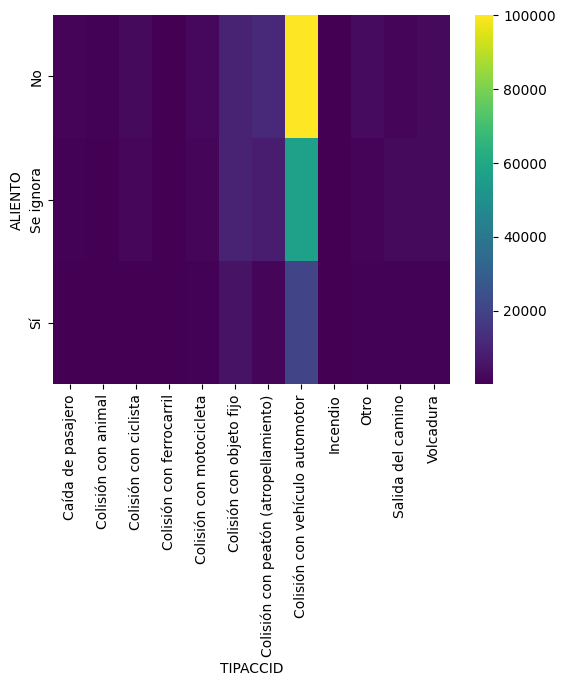

In [ ]:
seaborn.heatmap(atus.groupby(["ALIENTO", "TIPACCID"]).size().unstack(), 
    cmap="viridis")

<Axes: xlabel='GRUPO_HORA', ylabel='DIASEMANA'>

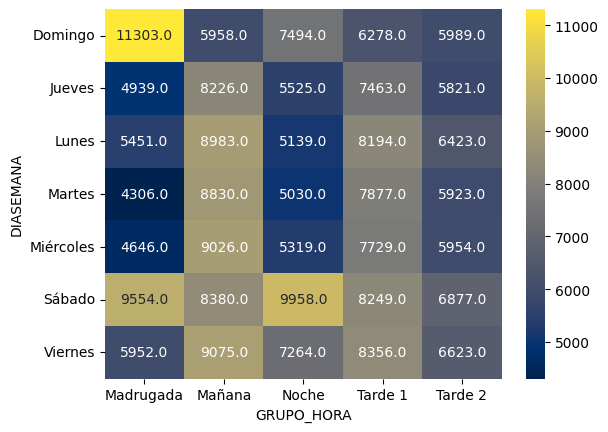

In [83]:
seaborn.heatmap(
    atus.groupby(["DIASEMANA", "GRUPO_HORA"]).size().unstack(),
    annot=True,
    fmt=".1f",
    cmap="cividis" # viridis, cividis, plasma, magma, inferno, PuBu
)